In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

pd.set_option('max.columns', None)

# Import Data

## Import results file

In [2]:
results = pd.read_csv('results.csv', index_col = 0)

results = results[['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue']]

results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley


# Convert data into Date, Venue, Course, and Race No. level

In [3]:
text = 'NATURAL EIGHT(S243)'

pattern = re.compile(r'([\w\W]+)?([\(])([A-Z0-9]+)([\)])')

def extract_horse_code(pattern, text):
#     print(text)
    match = re.match(pattern, text)
    return match.group(3)

In [4]:
results['horse_code'] = results['horse'].apply(lambda x: extract_horse_code(pattern, x))
results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344


## Clean 'plc'

In [5]:
results['plc']=results.apply(lambda x: re.sub(r'\D+','', str(x.plc)), axis=1)
results = results[results['plc']!='']
results

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14114,13,14,11.0,DISCIPLES TWELVE(P018),K Teetan,C Fownes,119.0,1107.0,1.0,10-1/4,10 11 14,1.10.21,66.0,2016-10-01,11,2,1200,GOOD,BEIJING HANDICAP,TURF - A+3 COURSE,1750000,Sha Tin,P018
14115,13,14,10.0,SPEEDY LONGWAH(S242),T H So,C S Shum,124.0,1124.0,13.0,50,14 14 14 14,1.30.08,99.0,2016-11-27,11,2,1400,GOOD,CHEVALIER SENIOR HOUSING HANDICAP,TURF - C COURSE,1750000,Sha Tin,S242
14116,13,14,12.0,MARVEL TRIBE(S142),K C Ng,K W Lui,110.0,1118.0,2.0,14-1/4,3 7 14,1.11.22,99.0,2017-01-01,11,2,1200,GOOD TO FIRM,TAI MO SHAN HANDICAP,TURF - B+2 COURSE,1750000,Sha Tin,S142
14117,13,14,13.0,LET US WIN(V381),K K Chiong,J Moore,108.0,1111.0,3.0,17,4 1 1 4 14,1.49.18,70.0,2017-03-05,11,2,1800,GOOD TO FIRM,TAIPA HANDICAP,TURF - C COURSE,1750000,Sha Tin,V381


In [22]:
#results[results['raceno'] == 1].groupby(['course','raceno']).size()

# results[(results['raceno'] == 1) & (results['date'] == '2015-06-03')].groupby(['venue','course']).size()

results.groupby(['date','venue','course','raceno']).size()


results[(results['course'] == 'TURF - A COURSE') & (results['date'] == '2015-06-03') & (results['raceno'] == 2)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
118,0,1,5.0,ROBUST MOMENTUM(P422),C Y Ho,C Fownes,122.0,1209.0,1.0,-,2 3 2 1,1.40.18,2.5,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P422
1232,1,2,1.0,AXIOM(P095),A Suborics,A Schutz,129.0,1088.0,12.0,1,10 10 9 2,1.40.34,82.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P095
2346,2,3,11.0,LIGHTNING AND GOLD(P354),W M Lai,C H Yip,114.0,1034.0,11.0,1-1/4,11 11 10 3,1.40.38,27.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P354
3460,3,4,7.0,CHINA DELIGHT(N148),T H So,K W Lui,121.0,1031.0,2.0,1-1/4,12 12 12 4,1.40.38,13.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N148
4574,4,5,2.0,AMAZING ALWAYS(N432),D Whyte,D E Ferraris,125.0,1133.0,7.0,1-1/4,8 7 8 5,1.40.40,6.8,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N432
5686,5,6,10.0,RED COURAGE(N110),K Teetan,J Size,117.0,1186.0,5.0,2,3 2 3 6,1.40.50,11.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N110
6797,6,7,12.0,DRAGON GLORY(P130),M Chadwick,C W Chang,113.0,1156.0,3.0,2,4 6 4 7,1.40.51,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P130
7900,7,8,3.0,CIRCUIT STAR(N220),K C Leung,K L Man,123.0,1054.0,9.0,2,7 8 7 8,1.40.52,30.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N220
9001,8,9,4.0,MAC ROW(N252),M L Yeung,A Lee,122.0,1001.0,8.0,3-3/4,9 9 11 9,1.40.78,9.9,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N252
10092,9,10,8.0,CONFUCIUS SPIRIT(S329),N Callan,S Woods,120.0,1088.0,4.0,5,6 5 6 10,1.40.98,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,S329


In [23]:
results.groupby(['date','venue','course','raceno']).size().to_frame('count_horse').reset_index()

,date,venue,course,raceno,count_horse
0,2015-06-03,Happy Valley,TURF - A COURSE,1,11
1,2015-06-03,Happy Valley,TURF - A COURSE,2,12
2,2015-06-03,Happy Valley,TURF - A COURSE,3,12
3,2015-06-03,Happy Valley,TURF - A COURSE,4,12
4,2015-06-03,Happy Valley,TURF - A COURSE,5,12
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,14
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,8
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,13
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,12


In [7]:
df = pd.pivot_table(results,
               index = ['date','venue','course','raceno'],
               columns = ['draw'],
               values = ['horse_code'],#,'trainer','jockey'],
               aggfunc = max)

df.reset_index(inplace = True)

In [8]:
df = df.droplevel(1, axis = 1)
df.columns = ['date', 'venue', 'course', 'raceno', 'horse_1', 'horse_2', 'horse_3',
      'horse_4', 'horse_5', 'horse_6', 'horse_7', 'horse_8', 'horse_9', 'horse_10',
      'horse_11', 'horse_12', 'horse_13', 'horse_14']

In [9]:
df.fillna('N/A', inplace = True)
df

,date,venue,course,raceno,horse_1,horse_2,horse_3,horse_4,horse_5,horse_6,horse_7,horse_8,horse_9,horse_10,horse_11,horse_12,horse_13,horse_14
0,2015-06-03,Happy Valley,TURF - A COURSE,1,S243,L251,N186,P331,P175,P204,S075,M406,M255,N359,S150,N/A,N/A,N/A
1,2015-06-03,Happy Valley,TURF - A COURSE,2,P422,N148,P130,S329,N110,N099,N432,N252,N220,P139,P354,P095,N/A,N/A
2,2015-06-03,Happy Valley,TURF - A COURSE,3,S445,N265,M273,N055,S086,P308,T072,P088,N134,N317,T133,T328,N/A,N/A
3,2015-06-03,Happy Valley,TURF - A COURSE,4,T163,S224,P213,S104,S349,N193,S330,S170,L136,S160,S295,N233,N/A,N/A
4,2015-06-03,Happy Valley,TURF - A COURSE,5,S137,P016,P371,P418,T069,S157,S254,P444,P064,N295,M026,S051,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,S332,A096,A120,S312,V361,T376,T046,V321,T094,V381,A095,A135,A109,V192
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,A066,T198,V397,P230,S393,V181,T118,A113,N/A,N/A,N/A,N/A,N/A,N/A
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,A352,A139,P363,V040,A286,A164,A248,A168,A249,T117,S362,N/A,A163,V176
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,V118,P396,A337,V235,A006,V256,A217,A257,V250,S419,V379,A287,N/A,N/A


In [10]:
win = pd.pivot_table(results[(results['plc'] == '1') | (results['plc'] == '1 DH')],
               index = ['date','venue','course','raceno'],
               values = ['draw'])

win = win.reset_index().rename(columns = {'draw':'draw_winner'})

win

,date,venue,course,raceno,draw_winner
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1.0
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1.0
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1.0
3,2015-06-03,Happy Valley,TURF - A COURSE,4,6.0
4,2015-06-03,Happy Valley,TURF - A COURSE,5,7.0
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,11.0
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,1.0
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,7.0
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,8.0


In [28]:
win['draw_winner'].unique()

array([ 1. ,  6. ,  7. ,  5. ,  2. ,  3. , 11. ,  8. , 10. ,  9. ,  4. ,
       12. , 14. , 13. ,  8.5,  4.5])

## Extracting horse code from the horse name

## Import horse info file

In [11]:
horse_info = pd.read_csv('horse_info.csv', index_col = 0)

horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN


## Extracting horse code from the horse name

In [13]:
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age,horse_code
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S259
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C368
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0,T421
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0,S424
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN,V614


In [14]:
horse_dim = horse_info[['horse_code','sex','country','age']]

horse_dim.loc[horse_dim['sex'].isnull(), 'sex'] = 'Others'
horse_dim.loc[horse_dim['sex'].isin(["Colt", "Rig", "Horse", "Gelding"]), 'sex'] = 'Male'
horse_dim.loc[horse_dim['sex'].isin(["Mare", "Filly"]), 'sex'] = 'Female'
horse_dim.loc[horse_dim['sex'].isin(["Brown", "Roan", "Grey"]), 'sex'] = 'Others'

horse_dim.loc[~horse_dim['country'].isin(["AUS", "NZ"]), 'country'] = 'Others'

horse_dim.loc[horse_dim['age'].isnull(), 'age'] = np.mean(horse_dim['age'])

no_horse = pd.DataFrame([['N/A','N/A','N/A',-1]],columns = ['horse_code','sex','country','age'])

horse_dim = pd.concat([horse_dim,no_horse]).reset_index(drop = True)

horse_dim

/Users/phoebeyum/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,horse_code,sex,country,age
0,S259,Others,Others,4.93235
1,C368,Others,Others,4.93235
2,T421,Male,AUS,6.00000
3,S424,Male,AUS,6.00000
4,V614,Male,Others,4.93235
...,...,...,...,...
3936,A221,Male,AUS,4.00000
3937,K180,Male,Others,4.93235
3938,B113,Male,NZ,4.00000
3939,V335,Male,Others,4.93235


In [70]:
dummy = pd.get_dummies(horse_dim[['sex','country']])

horse_dim = pd.merge(horse_dim, dummy, left_index = True, right_index = True)
horse_dim.drop(columns = ['sex','country'], inplace = True)

In [71]:
horse_dim

,horse_code,age,sex_Female,sex_Male,sex_N/A,sex_Others,country_AUS,country_N/A,country_NZ,country_Others
0,S259,4.93235,0,0,0,1,0,0,0,1
1,C368,4.93235,0,0,0,1,0,0,0,1
2,T421,6.00000,0,1,0,0,1,0,0,0
3,S424,6.00000,0,1,0,0,1,0,0,0
4,V614,4.93235,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3936,A221,4.00000,0,1,0,0,1,0,0,0
3937,K180,4.93235,0,1,0,0,0,0,0,1
3938,B113,4.00000,0,1,0,0,0,0,1,0
3939,V335,4.93235,0,1,0,0,0,0,0,1


# <font color='blue'> ------------ Phoebe's part start here --------------- </font>

## Create jockey table

In [12]:
df1 = results.loc[:,['date','horse_code','jockey','trainer','plc']]
df1['plc'] = df1['plc'].apply(lambda x: int(x))
df1['plc1'] = df1['plc'].apply(lambda x: 1 if x==1 else 0)
df1['plc2'] = df1['plc'].apply(lambda x: 1 if x==2 else 0)
df1['plc3'] = df1['plc'].apply(lambda x: 1 if x==3 else 0)

In [14]:
jockey = df1.groupby(['date','jockey']).sum().reset_index()
jockey = jockey.drop(columns=['plc'])

plc_cum = jockey.groupby(['jockey','date']).sum().groupby(level=[0]).cumsum().reset_index()
jockey = pd.merge(jockey, plc_cum,  how='left', 
         left_on=['date','jockey'], right_on = ['date','jockey'],suffixes=('', '_cum'))

g = pd.DataFrame(df1.groupby(['date','jockey']).size())
g = g.reset_index().rename(columns={0:'appear'})
app_cum = g.groupby(['jockey','date']).sum().groupby(level=[0]).cumsum().reset_index()
g = pd.merge(g,app_cum, left_on=['date','jockey'], right_on = ['date','jockey'],suffixes=('', '_cum'))
g['appear_cum'] = g['appear_cum']-g['appear']
jockey = pd.merge(jockey, g,  how='left', left_on=['date','jockey'], right_on = ['date','jockey'])

jockey['plc1_cum'] = jockey['plc1_cum']-jockey['plc1']
jockey['plc2_cum'] = jockey['plc2_cum']-jockey['plc2']
jockey['plc3_cum'] = jockey['plc3_cum']-jockey['plc3']

jockey['win_rate'] = jockey['plc1_cum']/jockey['appear_cum']
jockey['top2_cum'] = jockey['plc1_cum']+jockey['plc2_cum']
jockey['top2_rate'] = jockey['top2_cum']/jockey['appear_cum']
jockey['top3_cum'] = jockey['plc1_cum']+jockey['plc2_cum']+jockey['plc3_cum']
jockey['top3_rate'] = jockey['top3_cum']/jockey['appear_cum']

jockey = jockey.fillna(0)
jockey = jockey.replace(np.inf,0)

jockey = jockey.drop(columns = ['plc1','plc2','plc3','plc2_cum','plc3_cum','appear'])
jockey = jockey.rename(columns= {'plc1_cum':'win_cum'})
jockey = jockey.loc[:,['date','jockey','appear_cum','win_cum','top2_cum','top3_cum',
                       'win_rate','top2_rate','top3_rate']]

jockey

,date,jockey,appear_cum,win_cum,top2_cum,top3_cum,win_rate,top2_rate,top3_rate
0,2015-06-03,A Suborics,0,0,0,0,0.000000,0.000000,0.000000
1,2015-06-03,B Prebble,0,0,0,0,0.000000,0.000000,0.000000
2,2015-06-03,C K Tong,0,0,0,0,0.000000,0.000000,0.000000
3,2015-06-03,C Y Ho,0,0,0,0,0.000000,0.000000,0.000000
4,2015-06-03,D Lane,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2598,2017-07-16,N Callan,730,64,125,193,0.087671,0.171233,0.264384
2599,2017-07-16,S Clipperton,223,23,39,53,0.103139,0.174888,0.237668
2600,2017-07-16,U Rispoli,125,6,21,36,0.048000,0.168000,0.288000
2601,2017-07-16,W M Lai,84,1,3,5,0.011905,0.035714,0.059524


## Create trainer table

In [15]:
trainer = df1.groupby(['date','trainer']).sum().reset_index()
trainer = trainer.drop(columns=['plc'])

plc_cum = trainer.groupby(['trainer','date']).sum().groupby(level=[0]).cumsum().reset_index()
trainer = pd.merge(trainer, plc_cum,  how='left', 
         left_on=['date','trainer'], right_on = ['date','trainer'],suffixes=('', '_cum'))

g = pd.DataFrame(df1.groupby(['date','trainer']).size())
g = g.reset_index().rename(columns={0:'appear'})
app_cum = g.groupby(['trainer','date']).sum().groupby(level=[0]).cumsum().reset_index()
g = pd.merge(g,app_cum, left_on=['date','trainer'], right_on = ['date','trainer'],suffixes=('', '_cum'))
g['appear_cum'] = g['appear_cum']-g['appear']
trainer = pd.merge(trainer, g,  how='left', left_on=['date','trainer'], right_on = ['date','trainer'])

trainer['plc1_cum'] = trainer['plc1_cum']-trainer['plc1']
trainer['plc2_cum'] = trainer['plc2_cum']-trainer['plc2']
trainer['plc3_cum'] = trainer['plc3_cum']-trainer['plc3']

trainer['win_rate'] = trainer['plc1_cum']/trainer['appear_cum']
trainer['top2_cum'] = trainer['plc1_cum']+trainer['plc2_cum']
trainer['top2_rate'] = trainer['top2_cum']/trainer['appear_cum']
trainer['top3_cum'] = trainer['plc1_cum']+trainer['plc2_cum']+trainer['plc3_cum']
trainer['top3_rate'] = trainer['top3_cum']/trainer['appear_cum']

trainer = trainer.fillna(0)
trainer = trainer.replace(np.inf,0)

trainer = trainer.drop(columns = ['plc1','plc2','plc3','plc2_cum','plc3_cum','appear'])
trainer = trainer.rename(columns= {'plc1_cum':'win_cum'})
trainer = trainer.loc[:,['date','trainer','appear_cum','win_cum','top2_cum','top3_cum',
                       'win_rate','top2_rate','top3_rate']]

trainer

,date,trainer,appear_cum,win_cum,top2_cum,top3_cum,win_rate,top2_rate,top3_rate
0,2015-06-03,A Lee,0,0,0,0,0.000000,0.000000,0.000000
1,2015-06-03,A S Cruz,0,0,0,0,0.000000,0.000000,0.000000
2,2015-06-03,A Schutz,0,0,0,0,0.000000,0.000000,0.000000
3,2015-06-03,A T Millard,0,0,0,0,0.000000,0.000000,0.000000
4,2015-06-03,C Fownes,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
3173,2017-07-16,R Gibson,458,23,64,98,0.050218,0.139738,0.213974
3174,2017-07-16,T K Ng,336,15,31,43,0.044643,0.092262,0.127976
3175,2017-07-16,T P Yung,582,41,93,137,0.070447,0.159794,0.235395
3176,2017-07-16,W Y So,666,52,101,134,0.078078,0.151652,0.201201


# <font color='blue'> ----------------- Phoebe's part ends ------------------------- </font>

## Create dataset for prediction

In [82]:
pre_df = pd.merge(df, win
    , left_on = ['date','venue','course','raceno']
    , right_on = ['date','venue','course','raceno'])

In [86]:
tmp = pd.merge(pre_df, horse_dim,
        left_on = f'horse_1',
        right_on = 'horse_code',
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, horse_dim,
    left_on = f'horse_{i}',
    right_on = 'horse_code',
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, horse_dim,
        left_on = f'horse_14',
        right_on = 'horse_code',
        suffixes = ('_1','_14'))

dummy2 = pd.get_dummies(tmp[['venue','course']])

tmp = pd.merge(tmp, dummy2, left_index = True, right_index = True)

final = tmp.drop(columns = ['date', 'venue', 'course', 'raceno', 'horse_1', 'horse_2', 'horse_3',
      'horse_4', 'horse_5', 'horse_6', 'horse_7', 'horse_8', 'horse_9', 'horse_10', 'horse_11', 'horse_12',        'horse_13', 'horse_14', 'horse_code_1', 'horse_code_2', 'horse_code_3', 'horse_code_4', 'horse_code_5',      'horse_code_6', 'horse_code_7', 'horse_code_8', 'horse_code_9', 'horse_code_10',
      'horse_code_11', 'horse_code_12', 'horse_code_13', 'horse_code_14'])

final

,draw_winner,age_1,sex_Female_1,sex_Male_1,sex_N/A_1,sex_Others_1,country_AUS_1,country_N/A_1,country_NZ_1,country_Others_1,age_2,sex_Female_2,sex_Male_2,sex_N/A_2,sex_Others_2,country_AUS_2,country_N/A_2,country_NZ_2,country_Others_2,age_3,sex_Female_3,sex_Male_3,sex_N/A_3,sex_Others_3,country_AUS_3,country_N/A_3,country_NZ_3,country_Others_3,age_4,sex_Female_4,sex_Male_4,sex_N/A_4,sex_Others_4,country_AUS_4,country_N/A_4,country_NZ_4,country_Others_4,age_5,sex_Female_5,sex_Male_5,sex_N/A_5,sex_Others_5,country_AUS_5,country_N/A_5,country_NZ_5,country_Others_5,age_6,sex_Female_6,sex_Male_6,sex_N/A_6,sex_Others_6,country_AUS_6,country_N/A_6,country_NZ_6,country_Others_6,age_7,sex_Female_7,sex_Male_7,sex_N/A_7,sex_Others_7,country_AUS_7,country_N/A_7,country_NZ_7,country_Others_7,age_8,sex_Female_8,sex_Male_8,sex_N/A_8,sex_Others_8,country_AUS_8,country_N/A_8,country_NZ_8,country_Others_8,age_9,sex_Female_9,sex_Male_9,sex_N/A_9,sex_Others_9,country_AUS_9,country_N/A_9,country_NZ_9,country_Others_9,age_10,sex_Female_10,sex_Male_10,sex_N/A_10,sex_Others_10,country_AUS_10,country_N/A_10,country_NZ_10,country_Others_10,age_11,sex_Female_11,sex_Male_11,sex_N/A_11,sex_Others_11,country_AUS_11,country_N/A_11,country_NZ_11,country_Others_11,age_12,sex_Female_12,sex_Male_12,sex_N/A_12,sex_Others_12,country_AUS_12,country_N/A_12,country_NZ_12,country_Others_12,age_13,sex_Female_13,sex_Male_13,sex_N/A_13,sex_Others_13,country_AUS_13,country_N/A_13,country_NZ_13,country_Others_13,age_14,sex_Female_14,sex_Male_14,sex_N/A_14,sex_Others_14,country_AUS_14,country_N/A_14,country_NZ_14,country_Others_14,venue_Happy Valley,venue_Sha Tin,course_ALL WEATHER TRACK,course_TURF - A COURSE,course_TURF - A+3 COURSE,course_TURF - B COURSE,course_TURF - B+2 COURSE,course_TURF - C COURSE,course_TURF - C+3 COURSE
0,1.0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,0,1,9.00000,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,1,0,0,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,1,0,0,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,0,1,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,7.0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,0,0,0,1,9.00000,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,1,0,0,0,4.93235,0,1,0,0,1,0,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,7.0,4.93235,0,1,0,0,1,0,0,0,4.93235,0,1,0,0,0,0,0,1,7.00000,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,1,0,4.93235,0,1,0,0,0,0,0,1,7.00000,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,0,0,0,1,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,6.0,5.00000,0,1,0,0,0,0,0,1,5.00000,0,1,0,0,0,0,0,1,5.00000,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,0,0,0,1,5.00000,0,1,0,0,0,0,0,1,5.00000,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,1,0,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,5.0,5.00000,0,1,0,0,0,0,0,1,4.93235,0,1,0,0,1,0,0,0,5.00000,0,1,0,0,0,0,0,1,5.00000,0,1,0,0,0,0,0,1,5.00000,0,1,0,0,0,0,0,1,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,-1.00000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [87]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [113]:
x = final.drop(columns='draw_winner')
y = final['draw_winner'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 1)

y_train.value_counts()

1     93
5     73
3     72
7     68
2     65
6     63
9     60
12    57
4     57
8     56
10    48
11    38
14    18
13    17
Name: draw_winner, dtype: int64

In [114]:
# lr = LogisticRegression()
rf = RandomForestClassifier()

# lr.fit(x_train, y_train)
rf.fit(x_train, y_train)

# y_pred_prob = lr.predict_proba(x_test)
# y_pred = lr.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)
y_pred = rf.predict(x_test)

In [115]:
print(classification_report(y_test, y_pred, digits=5))

precision    recall  f1-score   support

           1    0.16842   0.48485   0.25000        33
           2    0.13333   0.08000   0.10000        25
           3    0.04000   0.05263   0.04545        19
           4    0.00000   0.00000   0.00000        19
           5    0.16667   0.25000   0.20000        20
           6    0.00000   0.00000   0.00000        17
           7    0.08696   0.09524   0.09091        21
           8    0.38462   0.27778   0.32258        18
           9    0.09091   0.04762   0.06250        21
          10    0.00000   0.00000   0.00000        18
          11    0.33333   0.11111   0.16667        18
          12    0.41667   0.33333   0.37037        15
          13    0.00000   0.00000   0.00000         7
          14    0.00000   0.00000   0.00000        11

    accuracy                        0.14885       262
   macro avg    0.13006   0.12375   0.11489       262
weighted avg    0.13700   0.14885   0.12671       262



In [117]:
y_pred_prob[0]

array([0.15, 0.12, 0.07, 0.13, 0.07, 0.11, 0.09, 0.1 , 0.04, 0.08, 0.  ,
       0.03, 0.  , 0.01])

In [170]:
prob_top_k = list()

for k in range(1,15):
    count_in_top_k = 0
    k = k

    for i in range(len(y_pred_prob)):
        indices = list(pd.Series(y_pred_prob[i]).nlargest(k).index + 1)
        if y_test.iloc[i] in indices:
            count_in_top_k += 1
        
    percent_correct = count_in_top_k/len(y_pred_prob)

    prob_top_k.append(percent_correct)

prob_top_k

[0.14885496183206107,
 0.22900763358778625,
 0.2824427480916031,
 0.37404580152671757,
 0.44274809160305345,
 0.4961832061068702,
 0.6068702290076335,
 0.683206106870229,
 0.7404580152671756,
 0.816793893129771,
 0.8740458015267175,
 0.9541984732824428,
 0.9923664122137404,
 1.0]

In [168]:
normal_odds = [i/14 for i in range(1,15)]
normal_odds

[0.07142857142857142,
 0.14285714285714285,
 0.21428571428571427,
 0.2857142857142857,
 0.35714285714285715,
 0.42857142857142855,
 0.5,
 0.5714285714285714,
 0.6428571428571429,
 0.7142857142857143,
 0.7857142857142857,
 0.8571428571428571,
 0.9285714285714286,
 1.0]

Text(0.5, 1.0, 'Model vs. Luck')

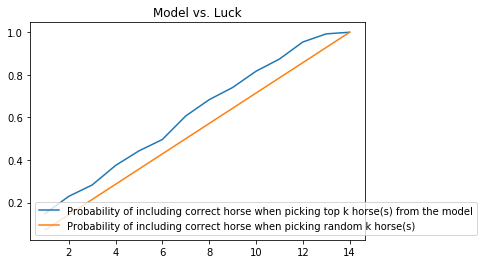

In [180]:
plt.plot([i for i in range(1,15)], prob_top_k)
plt.plot([i for i in range(1,15)], normal_odds)
plt.legend(['Probability of including correct horse when picking top k horse(s) from the model',
            'Probability of including correct horse when picking random k horse(s)'])
plt.title('Model vs. Luck')